<a href="https://colab.research.google.com/github/askewai/ML_challenge/blob/main/d12-cencusClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data source: UCI (doi.org/10.24432/C5VP42)

The USCensus1990 dataset is a multivariate dataset derived from the USCensus1990raw data, which represents a one percent sample of the 1990 U.S. Census Public Use Microdata Samples (PUMS) person records. It contains 2,458,285 instances and 68 categorical features, focusing on social science-related attributes. The dataset was created by randomizing the order of cases, selecting specific attributes, and transforming some variables for usability. Continuous variables were discretized, and discrete variables with many values were collapsed. Attributes are prefixed with 'i' for original values or 'd' for mapped values, with detailed mappings and hierarchies provided in accompanying files. The data is stored in a comma-delimited file, with no missing values, and includes attributes such as age, ancestry, citizenship, and disability status, among others. It is primarily used for clustering tasks in social science research.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
us_census_data_1990 = fetch_ucirepo(id=116)

# data (as pandas dataframes)
X = us_census_data_1990.data.features
y = us_census_data_1990.data.targets

# metadata
print(us_census_data_1990.metadata)

# variable information
print(us_census_data_1990.variables)

{'uci_id': 116, 'name': 'US Census Data (1990)', 'repository_url': 'https://archive.ics.uci.edu/dataset/116/us+census+data+1990', 'data_url': 'https://archive.ics.uci.edu/static/public/116/data.csv', 'abstract': 'The USCensus1990raw data set contains a one percent sample of the Public Use Microdata Samples (PUMS) person records drawn from the full 1990 census sample.', 'area': 'Social Science', 'tasks': ['Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2458285, 'num_features': 68, 'feature_types': ['Categorical'], 'demographics': ['Age', 'Income', 'Marital Status', 'Occupation', 'Sex'], 'target_col': None, 'index_col': ['caseid'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2001, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5VP42', 'creators': ['Chris Meek', 'Bo Thiesson', 'David Heckerman'], 'intro_paper': None, 'additional_info': {'summary': "The data was collected as part of the 1990 census. \r\n\r\nThere

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo

In [4]:
us_census_data_1990 = fetch_ucirepo(id=116)
X = us_census_data_1990.data.features
y = us_census_data_1990.data.targets

df = pd.concat([X, y], axis=1)

In [5]:
# Save dataset to disk to manage memory usage
with open("us_census_data.pkl", "wb") as f:
    pickle.dump(df, f)

# Load dataset when needed
with open("us_census_data.pkl", "rb") as f:
    df = pickle.load(f)

# EDA

In [6]:
df.head(15)

,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,5,0,1,0,0,5,3,2,2,1,...,0,5,0,2,1,1,0,11,1,0
1,6,1,1,0,0,7,5,2,2,0,...,0,1,0,2,1,1,0,5,1,0
2,3,1,2,0,0,7,4,2,2,0,...,0,2,0,2,1,1,0,10,1,0
3,4,1,2,0,0,1,3,2,2,0,...,0,1,0,1,1,1,0,10,1,0
4,7,1,1,0,0,0,0,2,2,0,...,3,0,0,0,2,2,0,5,6,0
5,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
6,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
7,4,1,2,0,0,6,0,2,2,0,...,0,0,0,2,1,1,0,11,1,0
8,6,1,1,0,0,1,0,2,2,0,...,3,0,0,1,1,2,0,10,1,0
9,3,1,12,0,0,1,0,2,2,0,...,1,0,0,1,1,2,0,8,1,1


In [7]:
df.nunique()

,0
dAge,8
dAncstry1,12
dAncstry2,12
iAvail,5
iCitizen,5
...,...
iWorklwk,3
iWWII,2
iYearsch,18
iYearwrk,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 68 columns):
 #   Column     Dtype
---  ------     -----
 0   dAge       int64
 1   dAncstry1  int64
 2   dAncstry2  int64
 3   iAvail     int64
 4   iCitizen   int64
 5   iClass     int64
 6   dDepart    int64
 7   iDisabl1   int64
 8   iDisabl2   int64
 9   iEnglish   int64
 10  iFeb55     int64
 11  iFertil    int64
 12  dHispanic  int64
 13  dHour89    int64
 14  dHours     int64
 15  iImmigr    int64
 16  dIncome1   int64
 17  dIncome2   int64
 18  dIncome3   int64
 19  dIncome4   int64
 20  dIncome5   int64
 21  dIncome6   int64
 22  dIncome7   int64
 23  dIncome8   int64
 24  dIndustry  int64
 25  iKorean    int64
 26  iLang1     int64
 27  iLooking   int64
 28  iMarital   int64
 29  iMay75880  int64
 30  iMeans     int64
 31  iMilitary  int64
 32  iMobility  int64
 33  iMobillim  int64
 34  dOccup     int64
 35  iOthrserv  int64
 36  iPerscare  int64
 37  dPOB       int64
 38  dP

In [9]:
df.describe()

,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,...,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06
mean,3.851643e+00,3.299006e+00,1.574252e+00,1.207488e-01,2.880964e-01,1.236083e+00,1.394556e+00,1.432078e+00,1.464860e+00,2.108714e-01,...,7.939100e-01,1.483541e+00,3.402331e-02,8.310208e-01,1.000718e+00,1.095047e+00,3.844509e-02,8.446546e+00,1.820591e+00,1.391918e-01
std,2.048492e+00,4.041179e+00,1.696150e+00,6.709576e-01,9.667118e-01,1.759400e+00,1.760919e+00,8.442641e-01,8.462626e-01,6.489750e-01,...,1.308956e+00,1.966293e+00,1.812891e-01,8.594720e-01,6.841873e-01,7.437089e-01,1.922683e-01,4.080579e+00,2.108889e+00,4.035386e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00
50%,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00
75%,6.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,...,3.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.100000e+01,2.000000e+00,0.000000e+00
max,7.000000e+00,1.100000e+01,1.200000e+01,4.000000e+00,4.000000e+00,9.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,...,3.000000e+00,6.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.700000e+01,7.000000e+00,2.000000e+00


In [10]:
df.isnull().sum()

,0
dAge,0
dAncstry1,0
dAncstry2,0
iAvail,0
iCitizen,0
...,...
iWorklwk,0
iWWII,0
iYearsch,0
iYearwrk,0


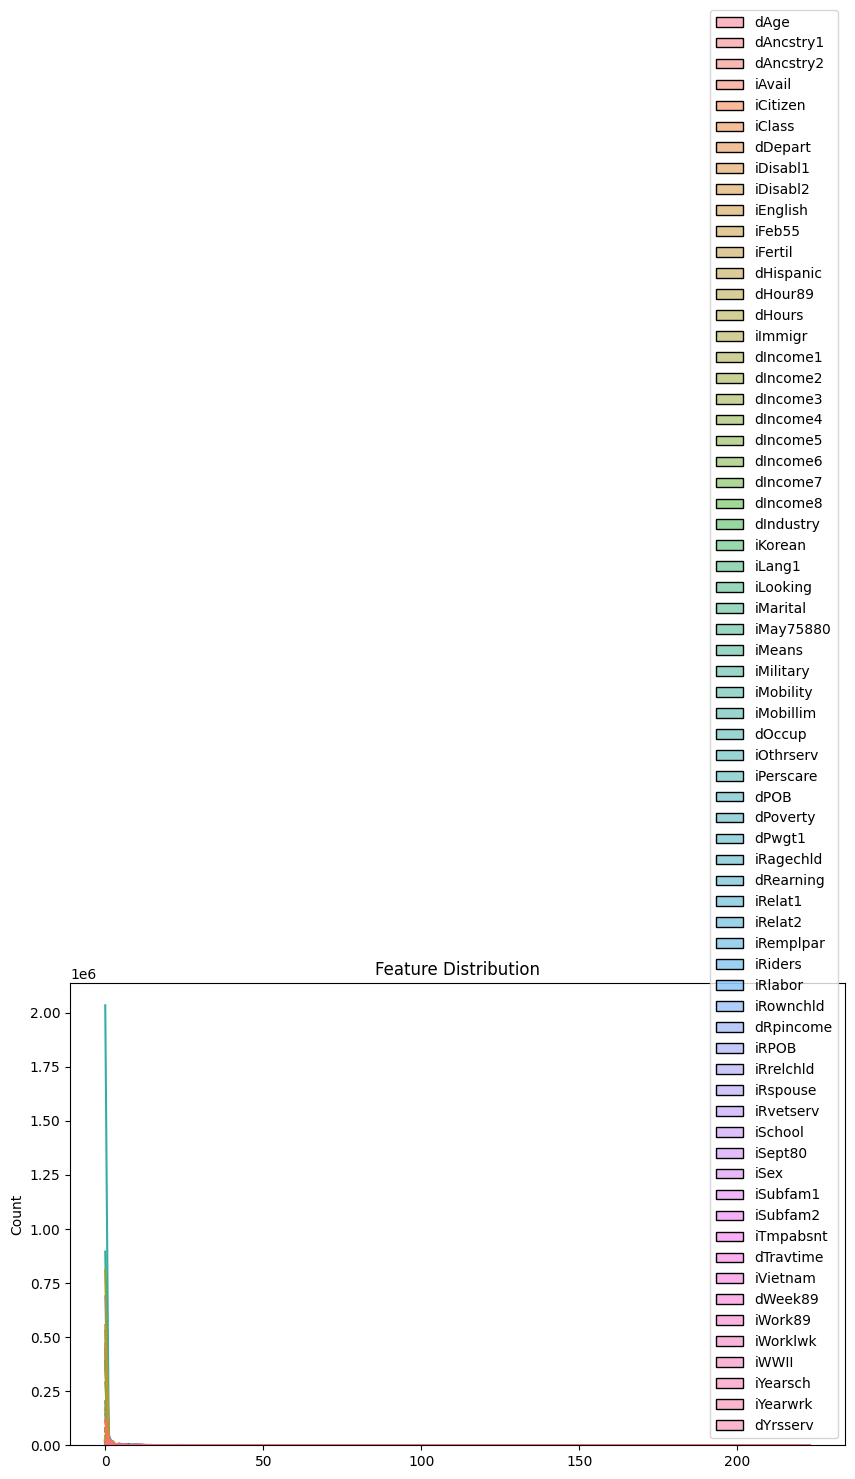

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df.sample(5000), bins=30, kde=True)  # Sampling to reduce memory usage
plt.title("Feature Distribution")
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
n_cols = len(num_cols)
num_rows = (n_cols // 5) + 1
fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna().sample(5000), bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

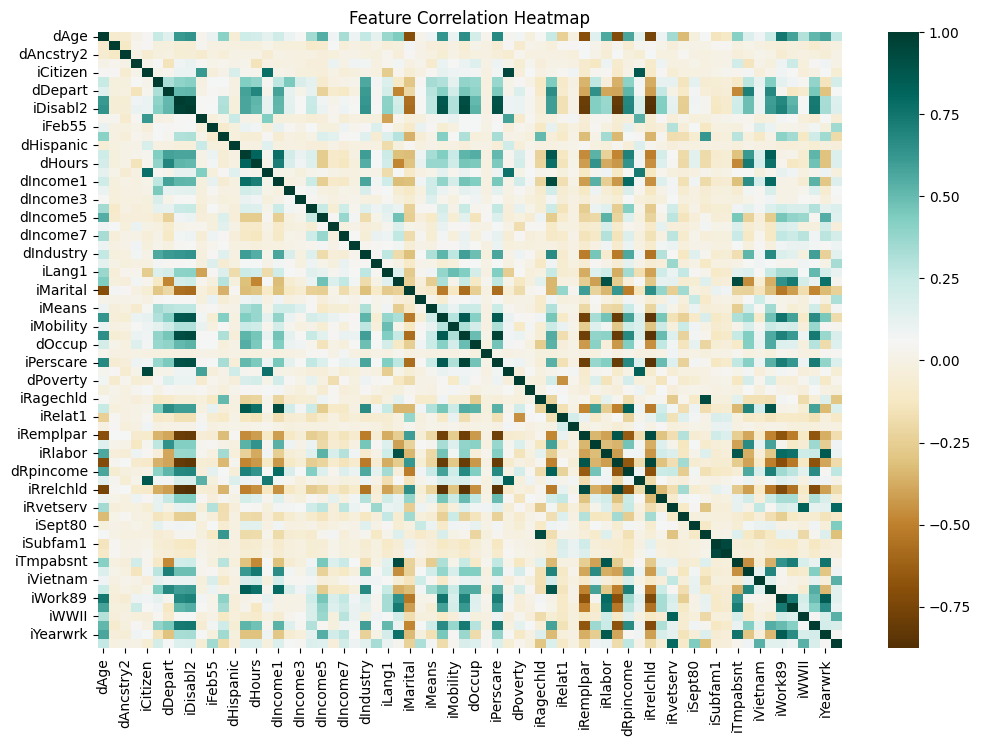

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.sample(5000).corr(), annot=False, cmap='BrBG')  # Sampling to optimize
plt.title("Feature Correlation Heatmap")
plt.show()

preprocessing

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
with open("X_scaled.pkl", "wb") as f:
    pickle.dump(X_scaled, f)

# Load scaled data when needed
with open("X_scaled.pkl", "rb") as f:
    X_scaled = pickle.load(f)

modelling

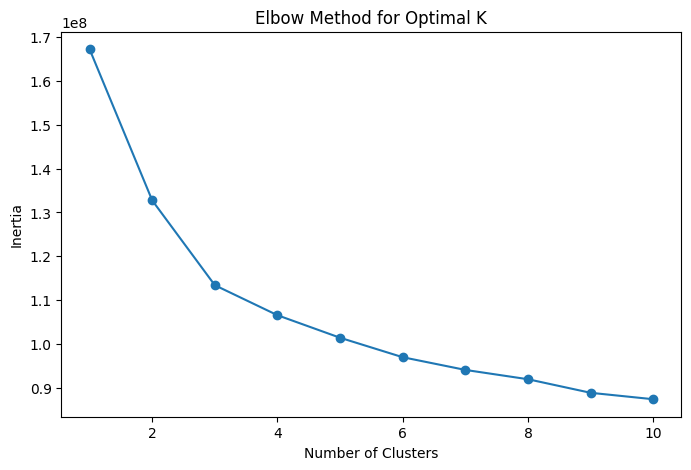

In [15]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [17]:
# Save clustering results
with open("clustered_data.pkl", "wb") as f:
    pickle.dump(df, f)

# Load clustering results when needed
with open("clustered_data.pkl", "rb") as f:
    df = pickle.load(f)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


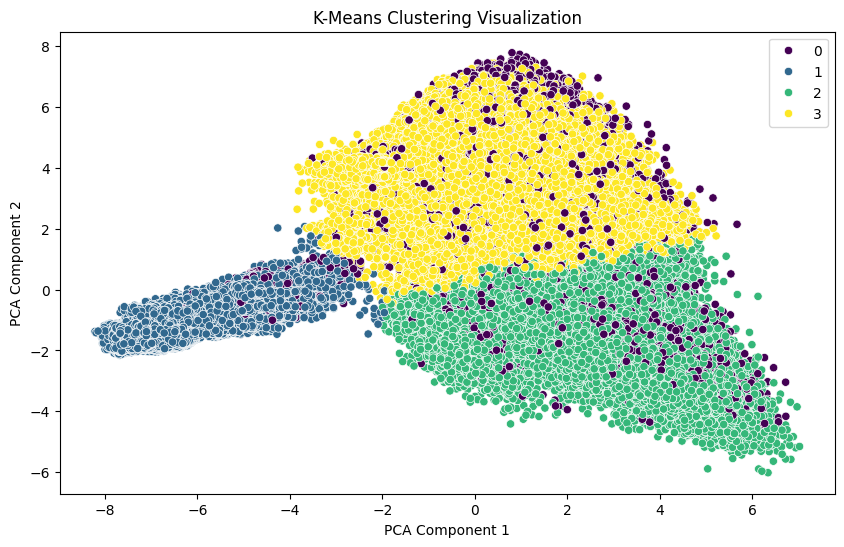

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()

In [19]:
print(df.groupby('Cluster').mean())

             dAge  dAncstry1  dAncstry2    iAvail  iCitizen    iClass  \
Cluster                                                                 
0        4.586452   3.935879   1.189191  0.181589  3.393489  1.449509   
1        1.118033   3.678328   1.720574  0.000003  0.121068  0.000047   
2        4.323141   2.952308   1.605836  0.029518  0.002748  2.118371   
3        5.273665   3.334891   1.506420  0.351457  0.005226  0.862276   

          dDepart  iDisabl1  iDisabl2  iEnglish  ...  iTmpabsnt  dTravtime  \
Cluster                                          ...                         
0        1.783904  1.890439  1.916990  1.555808  ...   1.025027   2.063241   
1        0.000024  0.000105  0.000115  0.134242  ...   0.000002   0.000021   
2        2.982059  1.957933  1.999244  0.075483  ...   0.030571   3.142784   
3        0.001526  1.718540  1.768095  0.110609  ...   2.615092   0.001358   

         iVietnam   dWeek89   iWork89  iWorklwk     iWWII   iYearsch  \
Cluster             

The clustering analysis provides valuable insights into the segmentation of individuals based on their age, work experience, education, and employment status. **Cluster 1 represents younger individuals with minimal work experience and lower education levels**, suggesting they might be students, recent graduates, or unemployed individuals with limited workforce participation. This insight could be useful for policymakers or businesses targeting early-career professionals with training or job placement programs.

**Cluster 3, on the other hand, represents the most experienced workforce, with the highest age and years of work experience**, indicating a group of older, well-established professionals. This insight could be beneficial for organizations looking to implement retirement planning, career transition programs, or senior workforce retention strategies.

**Cluster 2 appears to include older individuals with high education levels and active workforce participation**, though they have longer commute times, which may indicate that they work in urban areas but live in distant locations. This insight could be useful for urban planners and policymakers to improve transportation infrastructure and remote work policies.

Finally, **Cluster 0 represents individuals with moderate work experience and engagement**, possibly mid-career professionals. Their moderate employment levels suggest they may be in stable jobs but could still be looking for career advancements or reskilling opportunities. This insight could be leveraged by companies or educational institutions offering mid-career training programs.

Overall, these clusters reveal clear patterns in workforce engagement and demographic characteristics, which can be used for designing better employment policies, workforce training, and targeted economic programs.